In [37]:
import sqlite3

import numpy as np

# Creating connection to a .sqlite3 db. This will create the file when the script runs for the first time
conn = sqlite3.connect('db_big.sqlite3')
# Taking the cursor
c = conn.cursor()

In [38]:
c.execute('''select inspection.facility_zip, violation.points, strftime("%Y-%m",inspection.activity_date) from inspection join  violation on
inspection.serial_number = violation.serial_number
where inspection.activity_date between date('2015-07-01') and date('2017-12-31')
''')

data = c.fetchall()

In [39]:
# Converting to database result to numpy array
data = np.asarray(data)

In [5]:
#deriving unique post codes in all data
all_post_codes = np.unique(data[:,0])

all_post_codes_with_violations = np.empty((3005,2), dtype=object)

In [6]:

for i in range(len(all_post_codes)):
    total_violations = len(data[np.where(data[:,0] == all_post_codes[i])][:,1].astype(np.int32))
    
    na=np.array([all_post_codes[i], total_violations])
    
    all_post_codes_with_violations[i] = na
    
total_violations = all_post_codes_with_violations[:,1].astype(np.int)
sorted_violations = np.sort(total_violations)[-10:]

In [7]:
# finding postcodes associated with top violations

top_postcodes = []

for violation in sorted_violations:
    p = all_post_codes_with_violations[np.where(all_post_codes_with_violations[:,1]==str(violation))]
    top_postcodes.append(p[0][0])

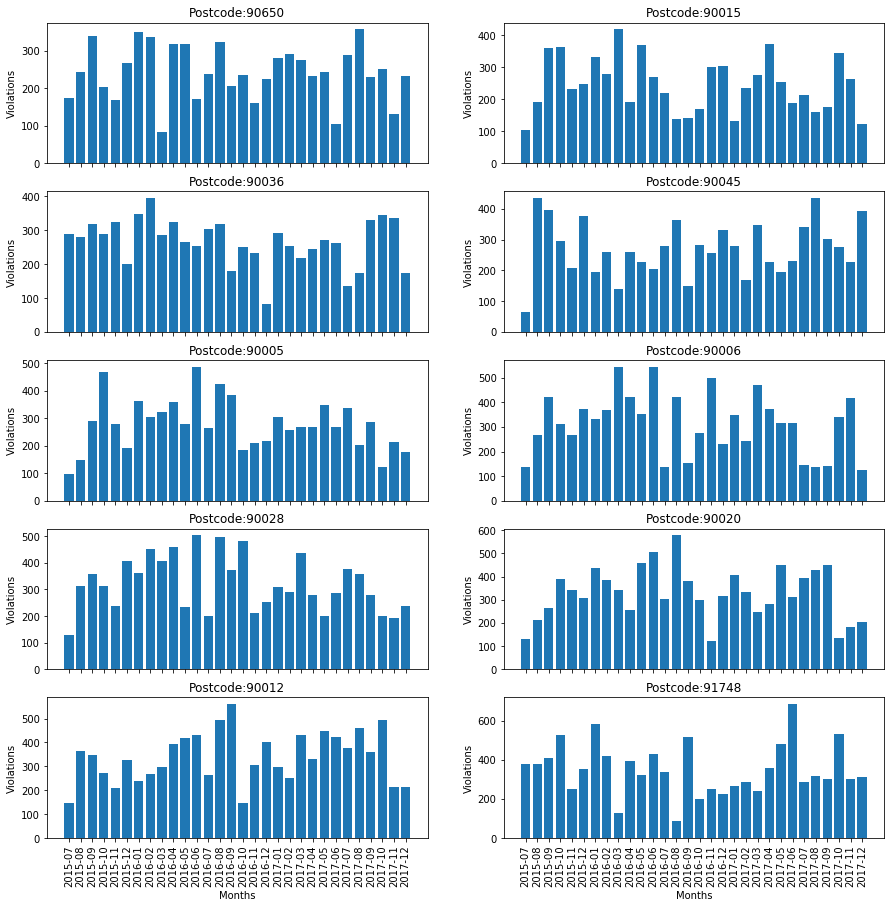

In [8]:
# Monthly violations for top postcodes
from matplotlib import pyplot as plt

dates = np.unique(data[:,2])
#postcode = '90650'

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15), sharex='col')

plt.setp(axs, xticks=range(30), xticklabels=dates)

for ax, post_code in zip(axs.flat,top_postcodes):
    postcode = post_code
    violations = np.empty(30)
    c1 = data[:,0] == postcode 
    for i in range(len(dates)):
        c2 = data[:,2] == dates[i]
        data_by_date = data[c1 & c2]
        violations[i] = len(data_by_date)
        
    ax.bar(range(30),violations)
    ax.set_title('Postcode:{}'.format(postcode))
    ax.set(ylabel='Violations')

    
axs[4][0].set(xlabel="Months")
axs[4][1].set(xlabel="Months")
for tick in axs[4][0].get_xticklabels():
    tick.set_rotation(90)
    
for tick in axs[4][1].get_xticklabels():
    tick.set_rotation(90)


    

plt.show()


In [15]:
# Get postcodes with greatest variance
all_post_codes_with_variance = np.empty((3005,2), dtype=object)

for i in range(len(all_post_codes)):
    violation_counts = np.empty(30)
    postcode = all_post_codes[i]
    c1 = data[:,0] == postcode
    for j in range(len(dates)):
        c2 = data[:,2] == dates[j]
        violation_count = len(data[c1 & c2])
        violation_counts[j]=violation_count
    highest = np.max(violation_counts)
    lowest = np.min(violation_counts)
    
    all_post_codes_with_variance[i] = np.array([postcode, highest-lowest])        

In [20]:
top_variances = np.sort(all_post_codes_with_variance[:,1].astype(np.float32))[-10:]

In [22]:
top_postcodes_by_variance = []

for variance in top_variances:
    p = all_post_codes_with_variance[np.where(all_post_codes_with_variance[:,1]==str(variance))]
    top_postcodes_by_variance.append(p[0][0])

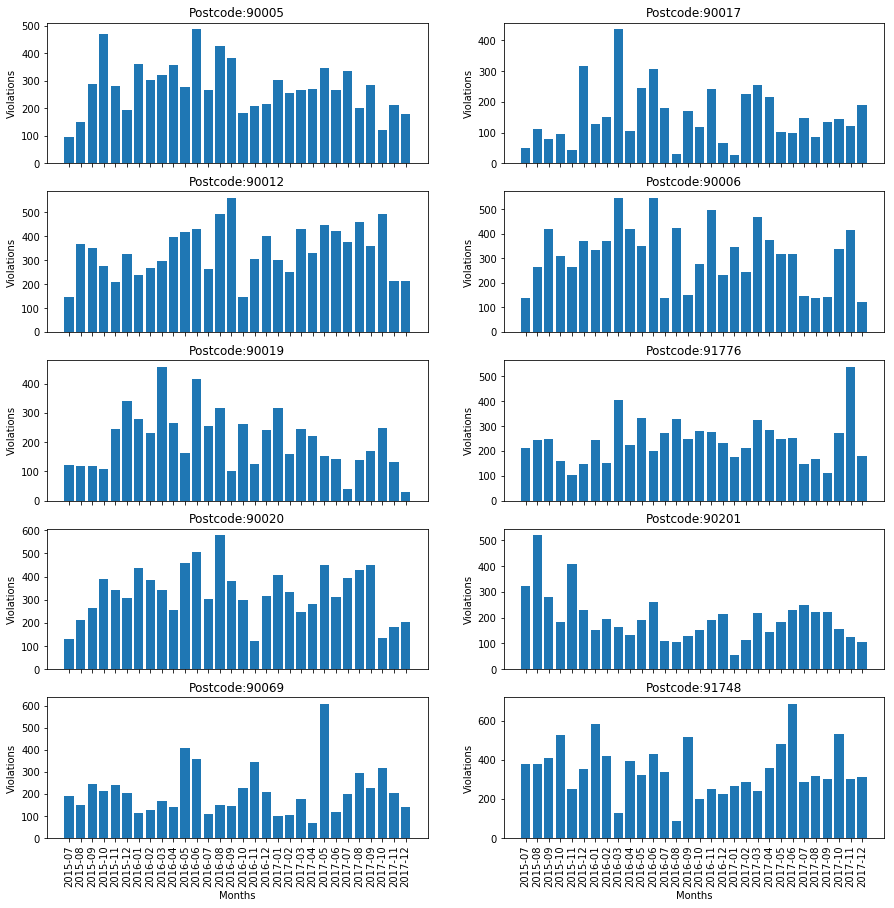

In [24]:
# Monthly violations for top postcodes with variance
from matplotlib import pyplot as plt2

dates = np.unique(data[:,2])
#postcode = '90650'

fig, axs = plt2.subplots(nrows=5, ncols=2, figsize=(15, 15), sharex='col')

plt2.setp(axs, xticks=range(30), xticklabels=dates)

for ax, post_code in zip(axs.flat,top_postcodes_by_variance):
    postcode = post_code
    violations = np.empty(30)
    c1 = data[:,0] == postcode 
    for i in range(len(dates)):
        c2 = data[:,2] == dates[i]
        data_by_date = data[c1 & c2]
        violations[i] = len(data_by_date)
        
    ax.bar(range(30),violations)
    ax.set_title('Postcode:{}'.format(postcode))
    ax.set(ylabel='Violations')

    
axs[4][0].set(xlabel="Months")
axs[4][1].set(xlabel="Months")
for tick in axs[4][0].get_xticklabels():
    tick.set_rotation(90)
    
for tick in axs[4][1].get_xticklabels():
    tick.set_rotation(90)


plt2.show()


In [33]:
data[data[:,1]=='CA'].shape

(897199, 4)

In [63]:
# Average violation all postcode combined
from collections import OrderedDict
violations_per_month = {}
for i in range(len(dates)):
    date = dates[i]
    c = data[:,2] == date
    data_by_date = data[c]
    try:
        violations_per_month[date[5:]].append(len(data_by_date))
    except:
        violations_per_month[date[5:]] = [len(data_by_date)]

average_violations_per_month = OrderedDict()

for month in sorted(violations_per_month.keys()):
    avg = np.average(violations_per_month[month])
    average_violations_per_month[int(month)] = avg

In [65]:
from matplotlib import pyplot as plt3

plt.bar(average_violations_per_month)

odict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [58]:
average_violations_per_month.values()

dict_values([24481.333333333332, 32103.666666666668, 30363.666666666668, 30564.0, 26989.666666666668, 28808.666666666668, 29475.5, 30107.0, 32577.0, 28746.0, 32732.5, 35082.5])